<a href="https://colab.research.google.com/github/ArifRahman336/potato_disease_detection/blob/main/Potato_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arifalp336","key":"1a4fb900b8d5d3479a00ff5bc2f09bd6"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
  0% 0.00/37.8M [00:00<?, ?B/s]
100% 37.8M/37.8M [00:00<00:00, 1.35GB/s]


In [4]:
import zipfile
import os

# Find the downloaded zip file
zip_file = "potato-dataset.zip"  # Example: wine-reviews.zip

# Unzip it
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("potato_dataset")  # Extracts to a folder named 'dataset'

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to dataset in Drive
data_dir = '/content/potato_dataset'  # Adjust this if needed

# Parameters
img_size = 224
batch_size = 32

# Data preprocessing & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


In [7]:
# Load pretrained base
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 650ms/step - accuracy: 0.7589 - loss: 0.6317 - val_accuracy: 0.9419 - val_loss: 0.1490
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.9519 - loss: 0.1392 - val_accuracy: 0.9744 - val_loss: 0.0810
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.9651 - loss: 0.0924 - val_accuracy: 0.9721 - val_loss: 0.0735
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 421ms/step - accuracy: 0.9640 - loss: 0.0930 - val_accuracy: 0.9605 - val_loss: 0.0973
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 435ms/step - accuracy: 0.9748 - loss: 0.0762 - val_accuracy: 0.9674 - val_loss: 0.1005
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9767 - val_loss: 0.0589
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 440ms/step - accuracy: 0.9780 - loss: 0.0572 - val_accuracy: 0.9907 - val_loss: 0.0397
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 438ms/step - accuracy: 0.9798 - loss: 0.0524 - val_accu

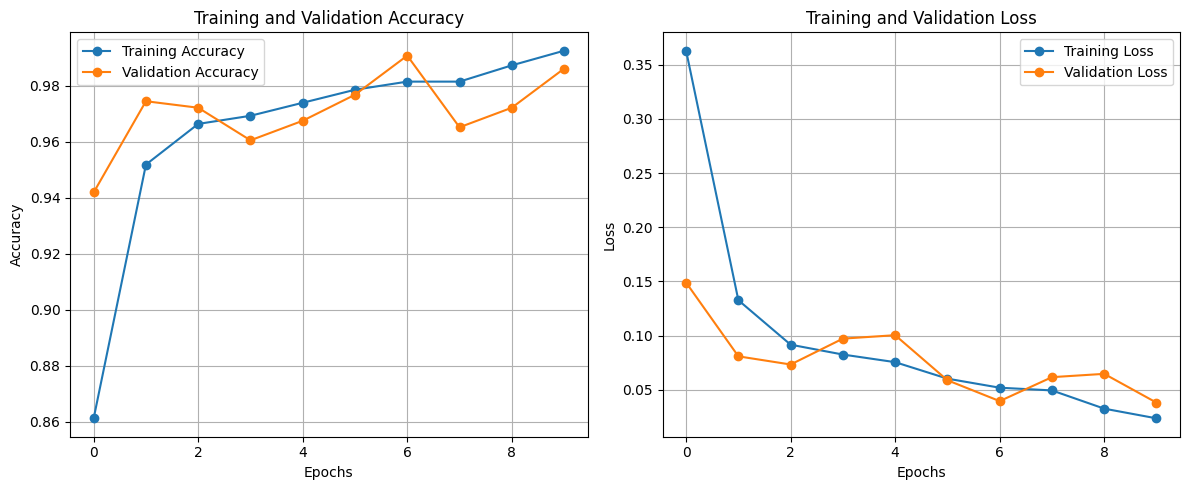

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy',marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [12]:
# Final training accuracy and loss
final_train_acc = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]

# Final validation accuracy and loss
final_val_acc = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Final Training Accuracy: 0.9925
Final Training Loss: 0.0238
Final Validation Accuracy: 0.9860
Final Validation Loss: 0.0383


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


<Figure size 1000x1000 with 0 Axes>

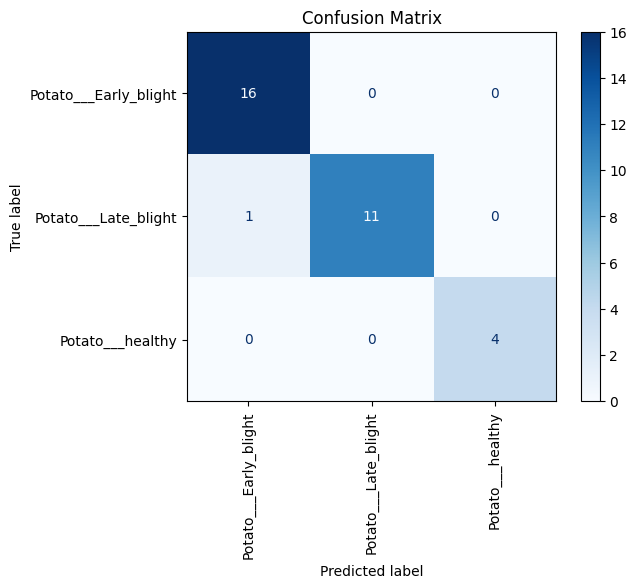

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get validation data (images and labels)
val_images, val_labels = next(val_gen)  # val_gen is your validation data generator

# Predict classes
pred_probs = model.predict(val_images)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(val_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
class_names = list(val_gen.class_indices.keys())

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')  # Save figure
plt.show()
